In [ ]:
# Módulos requeridos
!pip install pandas
!pip install seaborn
!pip install matplotlib
!pip install sklearn
!pip install pingouin
!pip install sympy

     |████████████████████████████████| 204kB 8.3MB/s 
  Created wheel for pingouin: filename=pingouin-0.3.11-cp37-none-any.whl size=203325 sha256=238d3542feafb37e805a185115b2a189cbf17e213de1752c3c5587fd83d043a5
  Stored in directory: /root/.cache/pip/wheels/79/46/ef/e377eb45c86f278f660d31c4a30e3f733063d28c89462f1aea
  Created wheel for littleutils: filename=littleutils-0.2.2-cp37-none-any.whl size=7051 sha256=db74ad8e9e475ad9b9f38b9d51e55dd82e79584c7bb49c18e3e87666ad45f3dd
  Stored in directory: /root/.cache/pip/wheels/53/16/9f/ac67d15c40243754fd73f620e1b9b6dedc20492ecc19a2bae1
Successfully built pingouin littleutils


In [ ]:
# Importando los módulos
import pandas as pd
import seaborn as sbrn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, confusion_matrix, classification_report
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import pandas_profiling as pdp
from sympy import *

In [ ]:
data = pd.read_csv('./Train.csv')

In [ ]:
data.columns = ['id', 'warehouse', 'shipment', 'customer_calls', 'customer_rating', 'cost', 'prior_purchases', 'importance', 'gender','discount','weight', 'ontime']

In [ ]:
data.describe()

,id,customer_calls,customer_rating,cost,prior_purchases,discount,weight,ontime
count,10999.00000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000,10999.000000
mean,5500.00000,4.054459,2.990545,210.196836,3.567597,13.373216,3634.016729,0.596691
std,3175.28214,1.141490,1.413603,48.063272,1.522860,16.205527,1635.377251,0.490584
min,1.00000,2.000000,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2750.50000,3.000000,2.000000,169.000000,3.000000,4.000000,1839.500000,0.000000
50%,5500.00000,4.000000,3.000000,214.000000,3.000000,7.000000,4149.000000,1.000000
75%,8249.50000,5.000000,4.000000,251.000000,4.000000,10.000000,5050.000000,1.000000
max,10999.00000,7.000000,5.000000,310.000000,10.000000,65.000000,7846.000000,1.000000


In [ ]:
data.head()

,id,warehouse,shipment,customer_calls,customer_rating,cost,prior_purchases,importance,gender,discount,weight,ontime
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


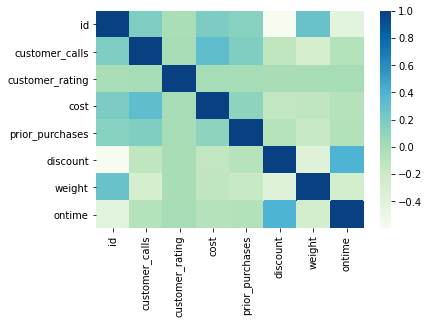

In [ ]:
sbrn.heatmap(data.corr(),cmap='GnBu')

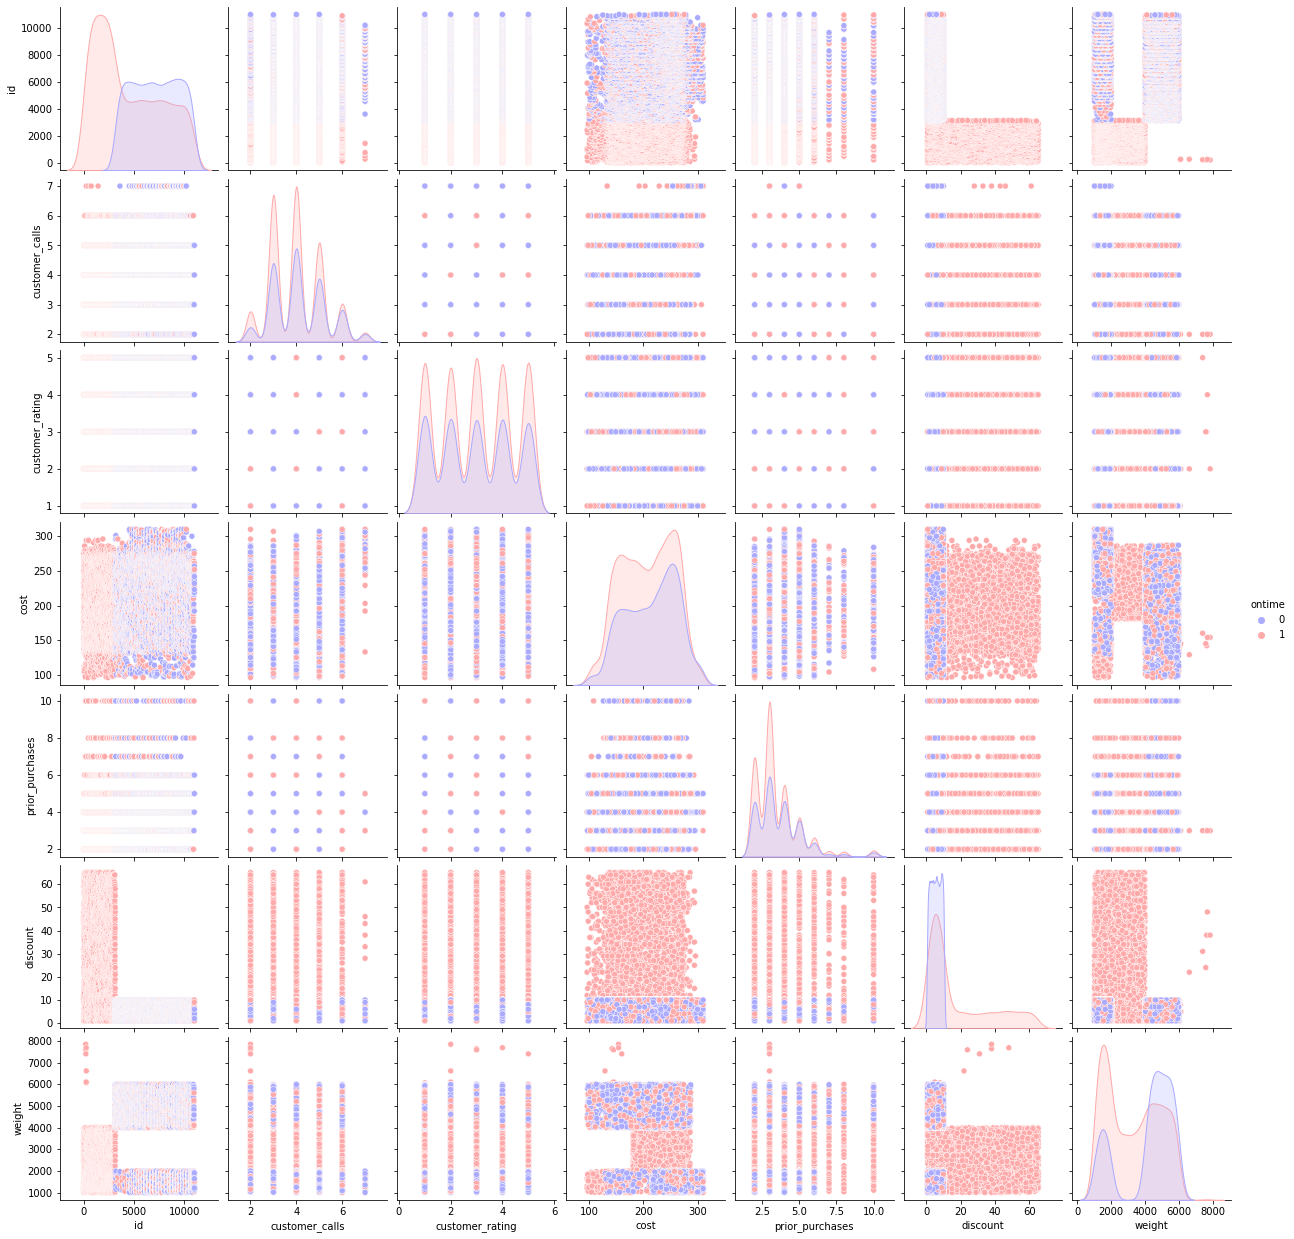

In [ ]:
sbrn.pairplot(data, hue="ontime", palette="bwr")

In [ ]:
f"No hay nulos: {0 == data.isnull().sum().sum()}"

'No hay nulos: True'

In [ ]:
label_encoder = LabelEncoder()
hot_encoder = OneHotEncoder()

data['gender'] = label_encoder.fit_transform(data['gender'])
data['warehouse'] = data['warehouse'].astype('category')
data['shipment'] = data['shipment'].astype('category')
data['importance'] = data['importance'].astype('category')
data = pd.get_dummies(data)

data

,id,customer_calls,customer_rating,cost,prior_purchases,gender,discount,weight,ontime,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Flight,shipment_Road,shipment_Ship,importance_high,importance_low,importance_medium
0,1,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,2,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,3,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,4,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,5,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,0,1,1538,1,1,0,0,0,0,0,0,1,0,0,1
10995,10996,4,1,232,5,0,6,1247,0,0,1,0,0,0,0,0,1,0,0,1
10996,10997,5,4,242,5,0,4,1155,0,0,0,1,0,0,0,0,1,0,1,0
10997,10998,5,2,223,6,1,2,1210,0,0,0,0,0,1,0,0,1,0,0,1


In [ ]:
X = data[['warehouse_A', 'warehouse_B', 'warehouse_C', 'warehouse_D','warehouse_F', 'shipment_Flight', 'shipment_Road', 'shipment_Ship', 'customer_calls', 'customer_rating', 'cost', 'prior_purchases', 'importance_high', 'importance_low', 'importance_medium', 'gender', 'discount', 'weight']]
Y = data['ontime']
clustering = KMeans(n_clusters=2, random_state=5)
clustering.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=5, tol=0.0001, verbose=0)

In [ ]:
plotting_data = data
plotting_data

,id,customer_calls,customer_rating,cost,prior_purchases,gender,discount,weight,warehouse_A,warehouse_B,warehouse_C,warehouse_D,warehouse_F,shipment_Flight,shipment_Road,shipment_Ship,importance_high,importance_low,importance_medium
0,1,4,2,177,3,0,44,1233,0,0,0,1,0,1,0,0,0,1,0
1,2,4,5,216,2,1,59,3088,0,0,0,0,1,1,0,0,0,1,0
2,3,2,2,183,4,1,48,3374,1,0,0,0,0,1,0,0,0,1,0
3,4,3,3,176,4,1,10,1177,0,1,0,0,0,1,0,0,0,0,1
4,5,2,2,184,3,0,46,2484,0,0,1,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10994,10995,4,1,252,5,0,1,1538,1,0,0,0,0,0,0,1,0,0,1
10995,10996,4,1,232,5,0,6,1247,0,1,0,0,0,0,0,1,0,0,1
10996,10997,5,4,242,5,0,4,1155,0,0,1,0,0,0,0,1,0,1,0
10997,10998,5,2,223,6,1,2,1210,0,0,0,0,1,0,0,1,0,0,1


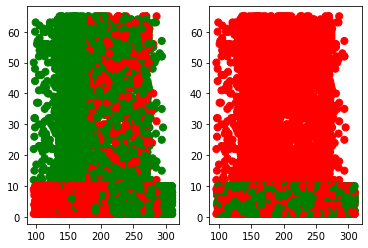

In [ ]:
color_theme = np.array(['green', 'red'])
plt.subplot(1,2,1)

plt.scatter(x=data['cost'], y=data['discount'], c=color_theme[clustering.labels_], s=50)
plt.subplot(1,2,2)

plt.scatter(x=data['cost'], y=data['discount'], c=color_theme[Y], s=50)


In [ ]:
relabel = np.choose(clustering.labels_, [1,0]).astype(np.int64)

print(classification_report(Y, relabel))

              precision    recall  f1-score   support

           0       0.51      0.76      0.61      4436
           1       0.76      0.51      0.61      6563

    accuracy                           0.61     10999
   macro avg       0.64      0.64      0.61     10999
weighted avg       0.66      0.61      0.61     10999

